# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix
)
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
churn_data = pd.read_csv("/content/drive/MyDrive/PG_AIML/AML/Project_TheraBank/BankChurners.csv")
data = churn_data.copy()

## Data Overview

- Observations
- Sanity checks

###Check the shape of the dataset

In [5]:
data.shape

(10127, 21)



*   There are 10127 rows and 21 columns in the dataset.





###Display the first and last five rows in the dataset

In [6]:
# show the first 5 rows
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
# show the last 5 rows
data.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


###Check the datatype of the columns in the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_



*   There are 15 numerical and 6 categorical columns in the dataset.
*   Columns 'Education_Level' & 'Marital_Status' has some null values.



###Check for duplicate values

In [9]:
data.duplicated().sum()

0



*   There are no duplicate values in the dataset.



###Check for missing values

In [10]:
data.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,0
Card_Category,0
Months_on_book,0




*   Columns 'Education_Level' & 'Marital_Status' has missing values.



###Statistical summary of the dataset

In [11]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,NaN,NaN,NaN,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Attrition_Flag,10127,2,Existing Customer,8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Age,10127.000,NaN,NaN,NaN,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Gender,10127,2,F,5358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependent_count,10127.000,NaN,NaN,NaN,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Education_Level,8608,6,Graduate,3128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,9378,3,Married,4687,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income_Category,10127,6,Less than $40K,3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Category,10127,4,Blue,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Months_on_book,10127.000,NaN,NaN,NaN,35.928,7.986,13.000,31.000,36.000,40.000,56.000




*   'Attrition_Flag' column has 2 unique values.
*   The average customer age is around 46 years old.
* The average credit limit is ~$8632.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [14]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [15]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [16]:
# let's remove the unique client Id from the dataset as it wouldn't provide any meaningful information on analysis
data.drop(columns=['CLIENTNUM'], axis=1, inplace=True)

In [17]:
# let's encode the target variable 'Attrition_Flag' with 0 and 1 for Existing and Attrited customers respectively
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

###Univariate Analysis

**Customer_Age**

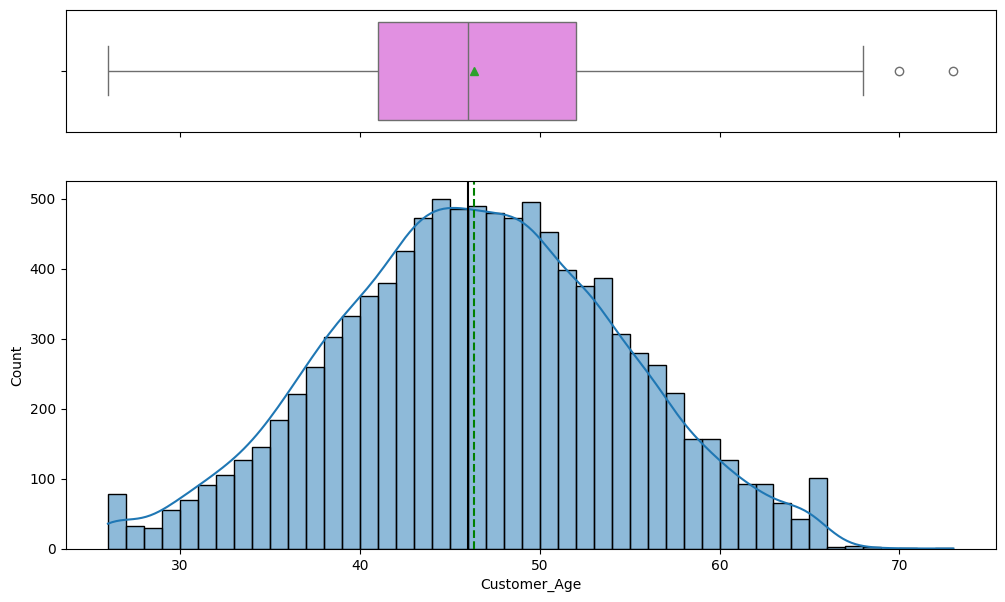

In [18]:
histogram_boxplot(data, "Customer_Age", kde=True)



*   Customer age data exhibit a uniform distribution.
* There are not many outliers in the data.



**How is the total transaction amount distributed?**

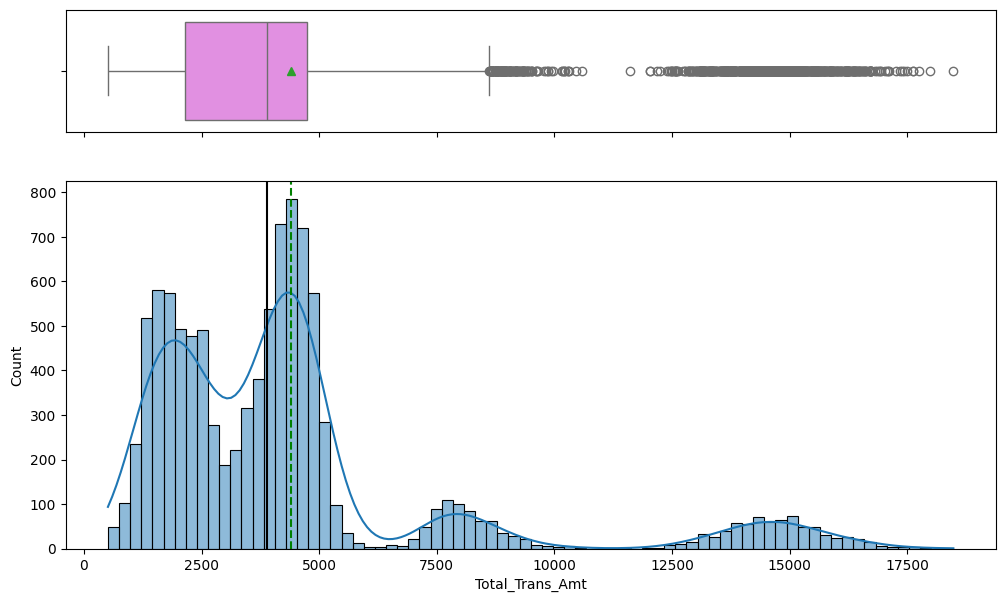

In [19]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)



*   Total transaction amount data is right skewed.
*   There are a lot of outliers in the data.



**Months_on_book**

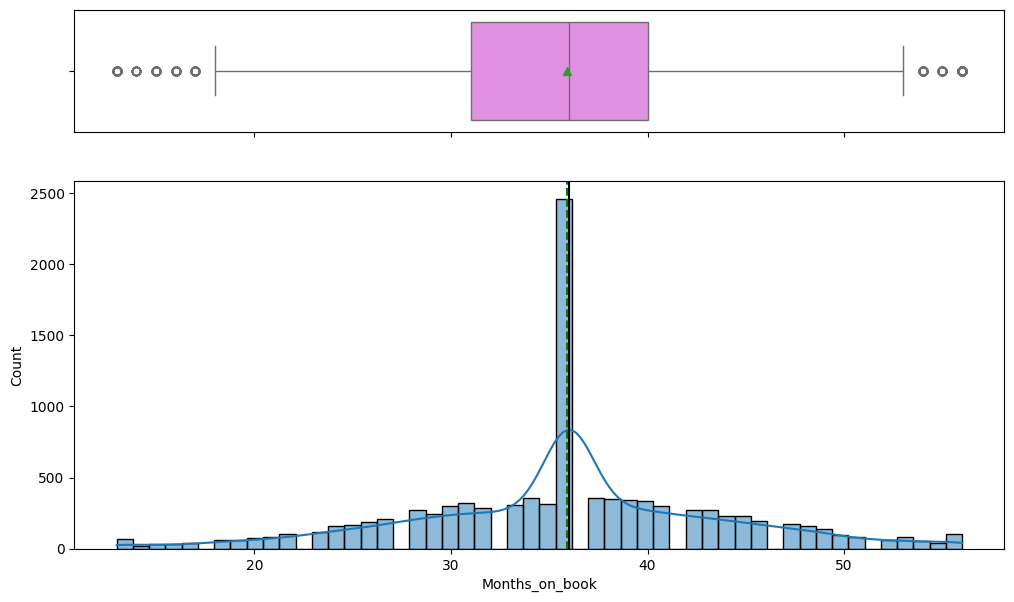

In [20]:
histogram_boxplot(data, "Months_on_book", kde=True)



*   Months on book data shows a uniform distribution.
*   There are some outliers in this data.
*  About 2500 customers has the months on book value as around 36 months.



**Credit_Limit**

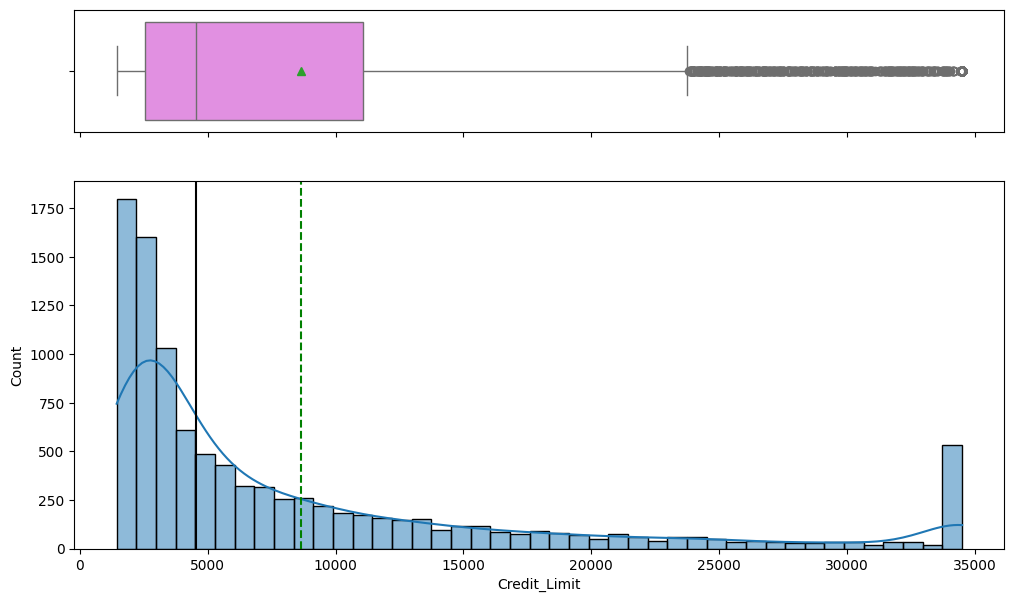

In [21]:
histogram_boxplot(data, "Credit_Limit", kde=True)



*   Credit limit data is skewed to the right.
*   There are many outliers to this data.



**Total_Revolving_Bal**

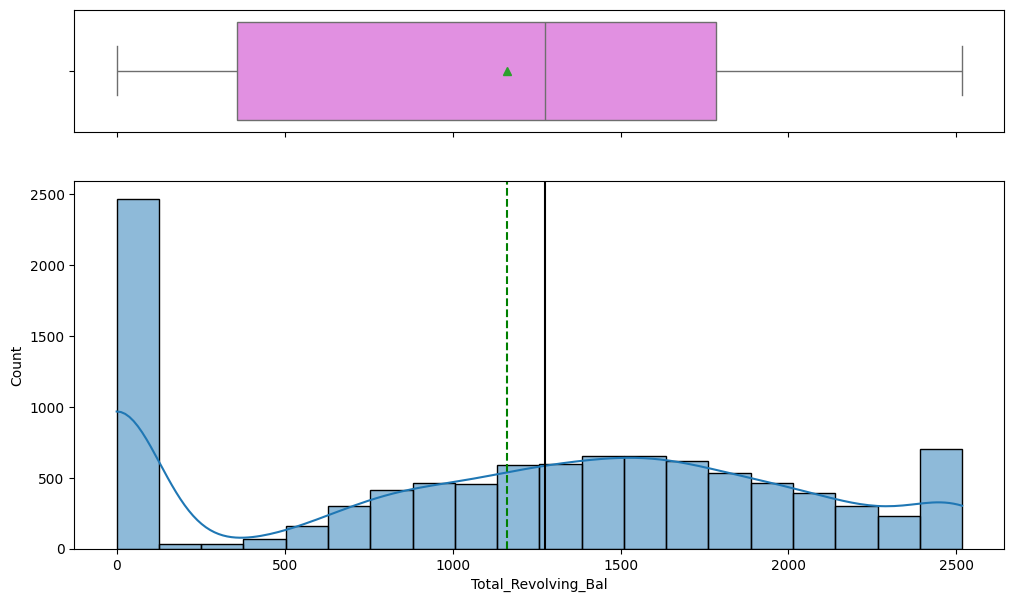

In [22]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)



*   Total revolving balance is close to 0 for around 2500 customers.
*   The data is exhibiting a uniform distribution.



**Avg_Open_To_Buy**

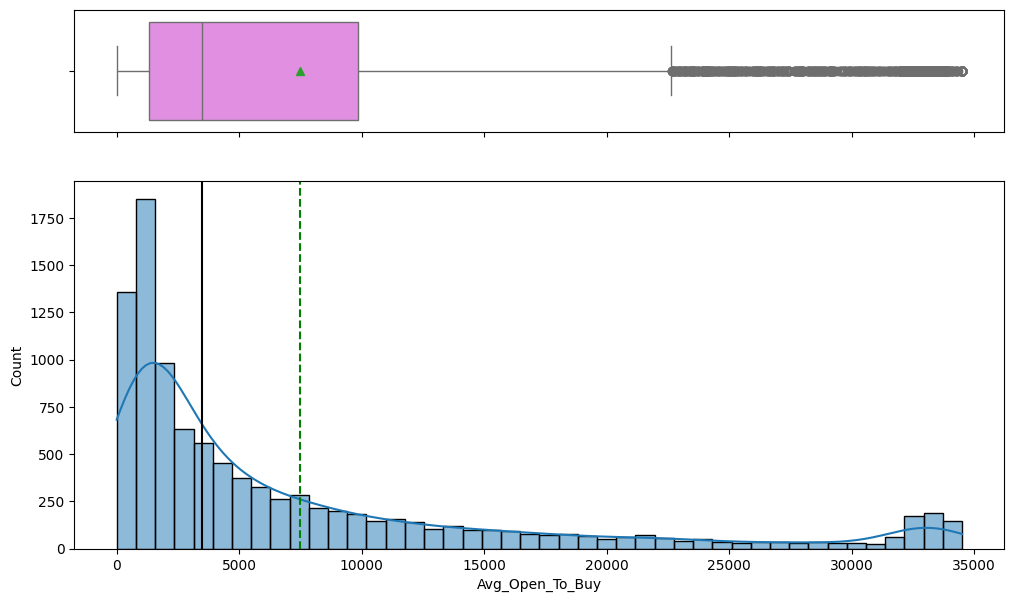

In [23]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)



*   Average open to buy amount data is right skewed.
*   There are many outliers in the data.



**Total_Trans_Ct**

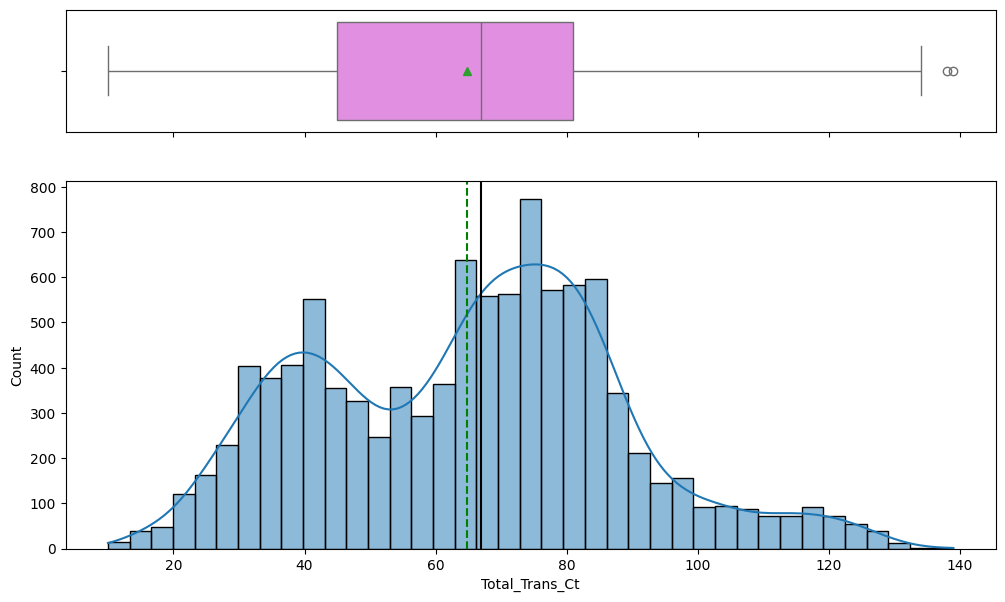

In [24]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)

*   Total transaction count data shows a slight right skewness.
*   There are very little outliers in the data.

**Total_Ct_Chng_Q4_Q1**

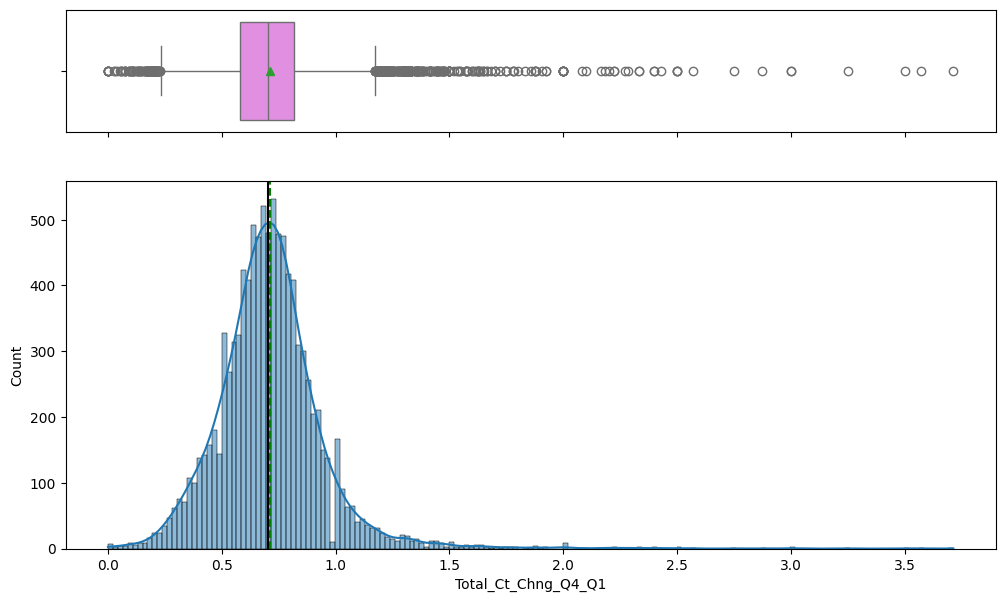

In [25]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)

*   This data is right skewed.
*   There are many outliers in the data.

**Avg_Utilization_Ratio**

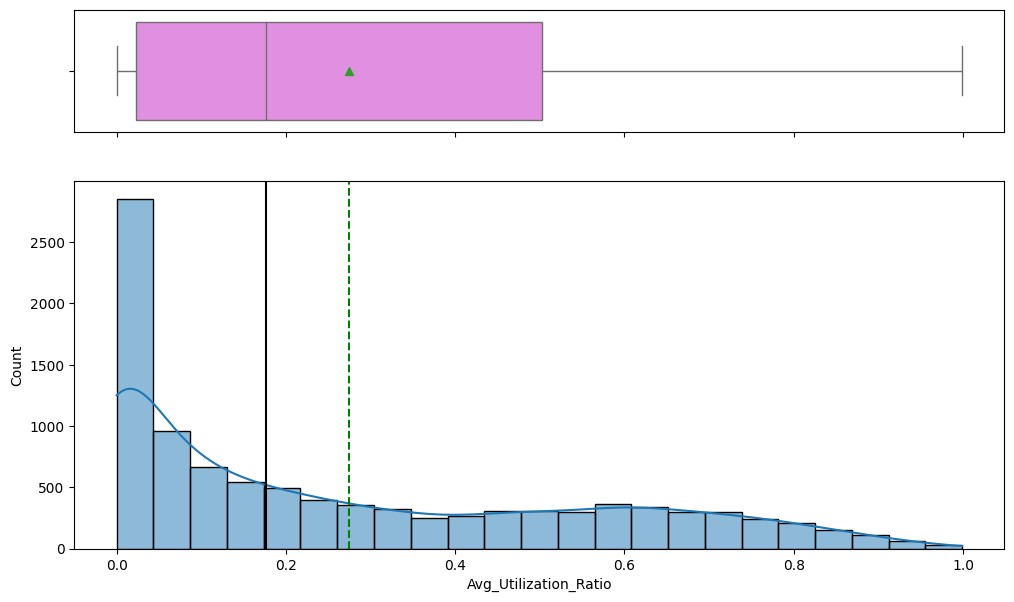

In [26]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)



*   This value is near 0 for many customers.
*   Data exhibits right skewness.
* There are no outliers.



**Dependent_count**

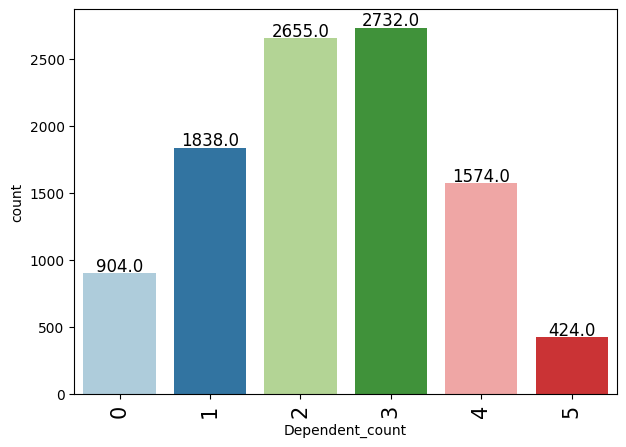

In [27]:
labeled_barplot(data, "Dependent_count")



*   Customers with 2 & 3 dependents are the highest in count.



**Total_Relationship_Count**

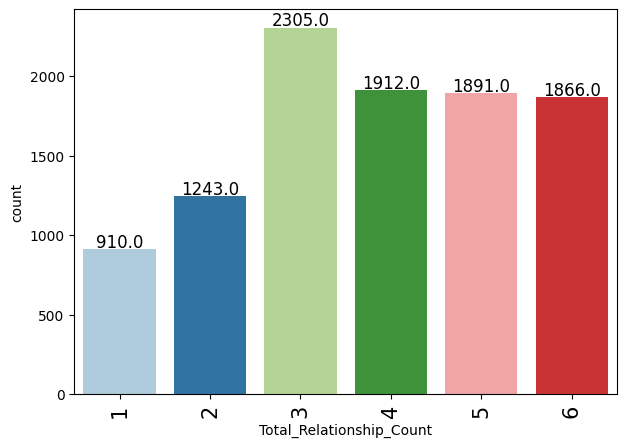

In [28]:
labeled_barplot(data, "Total_Relationship_Count")



*   Customers with just 1 product is the lowest in count.



**Months_Inactive_12_mon**

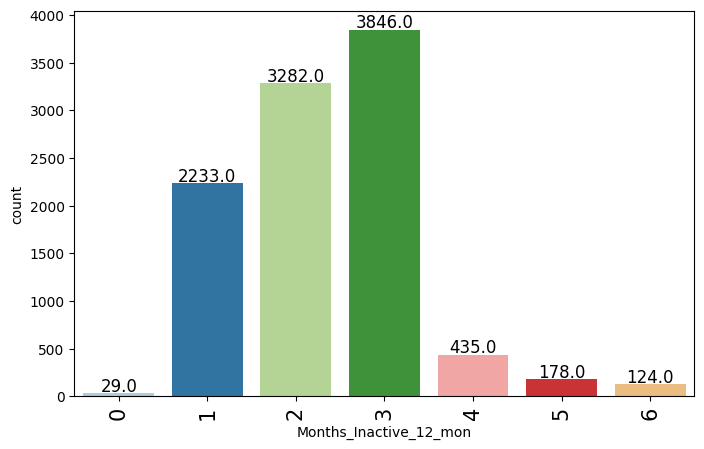

In [29]:
labeled_barplot(data, "Months_Inactive_12_mon")



*   Customers who are inactive for more than 4 months are very low in count.



**Contacts_Count_12_mon**

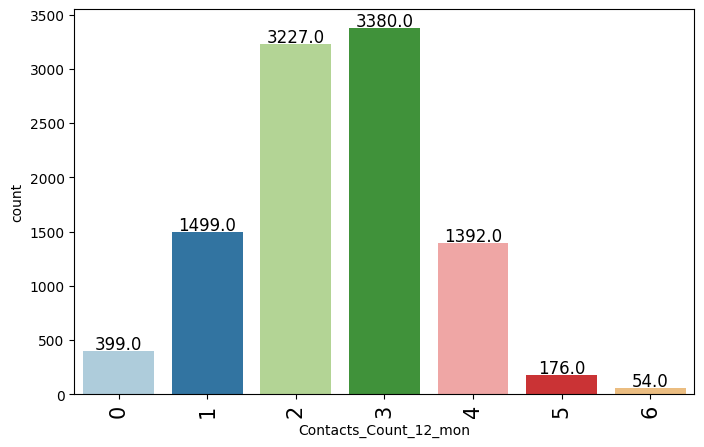

In [30]:
labeled_barplot(data, "Contacts_Count_12_mon")



*   ~400 customers had no contact with the bank in the last 12 months.



**Marital_Status**

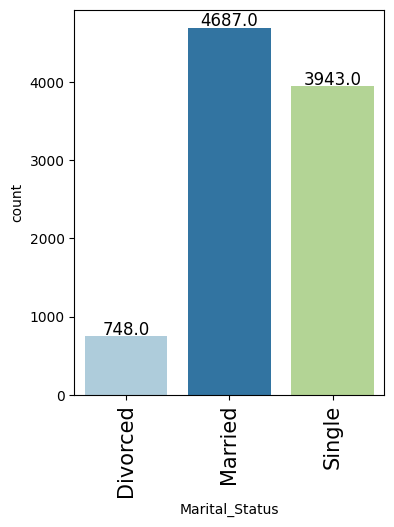

In [31]:
labeled_barplot(data, "Marital_Status")

* Married customers are the highest in the dataset.

**How is the distribution of the level of education of customers?**

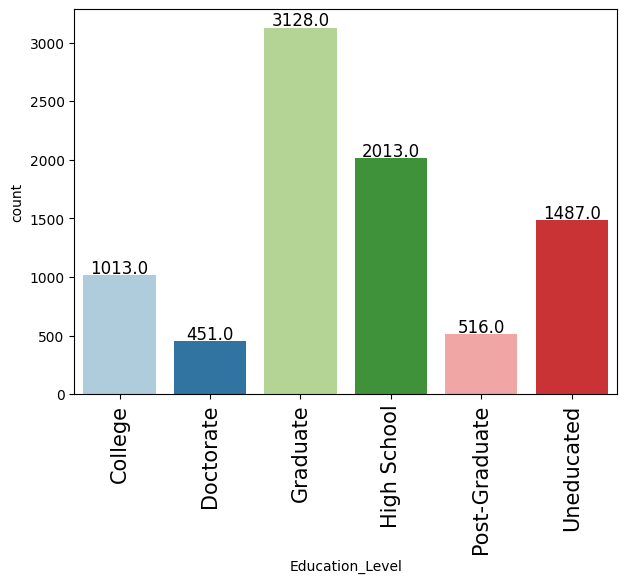

In [32]:
labeled_barplot(data, "Education_Level")



*   Graduate customers are the highest in count.
*   Uneducated customer count is also relatively high.



**How is the distribution of the level of income of customers?**

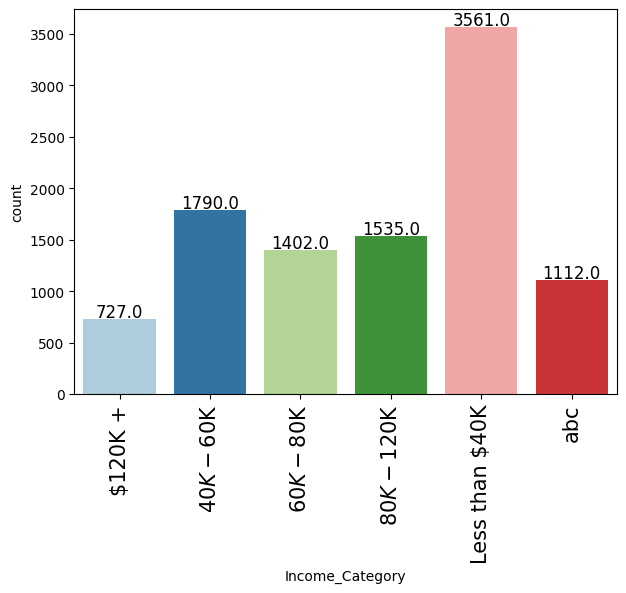

In [33]:
labeled_barplot(data, "Income_Category")



*   Largest group of customers has less than $40k annual salary.
*   There are some invalid data in the income set.



**Card_Category**

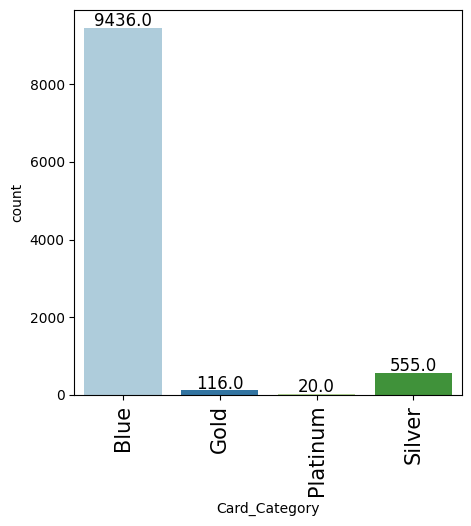

In [34]:
labeled_barplot(data, "Card_Category")



*   Blue category card has the highest number of customers.




**Attrition_Flag**

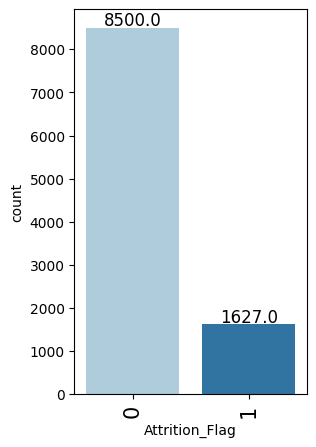

In [35]:
labeled_barplot(data, "Attrition_Flag")



*   The distribution is imbalanced for the target variable.



###Bivariate Analysis

**Which attributes have a strong correlation with each other?**

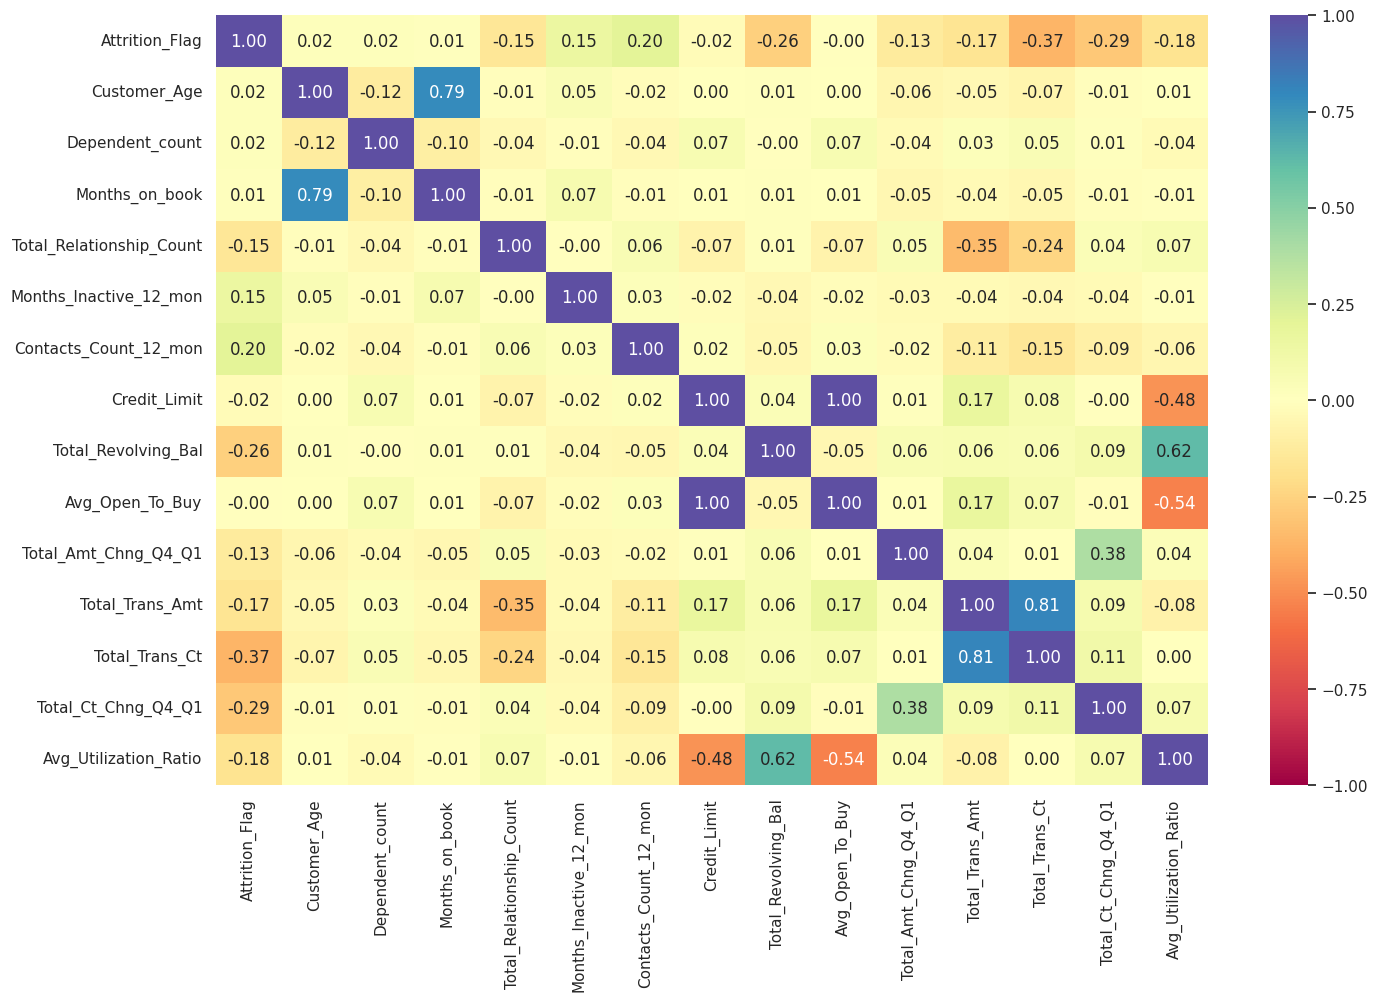

In [36]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



*   Contacts_Count_12_mon and Months_Inactive_12_mon columns shows the highest positive correlation with Attrition_Flag.
*   Avg_Open_To_Buy and Credit_Limit shows perfect positive correlation.
* Total_Trans_Ct and Total_Trans_Amt shows very high positive correlation.
* Months_on_book and Customer_Age shows very high positive correlation.



**How does the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)?**

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


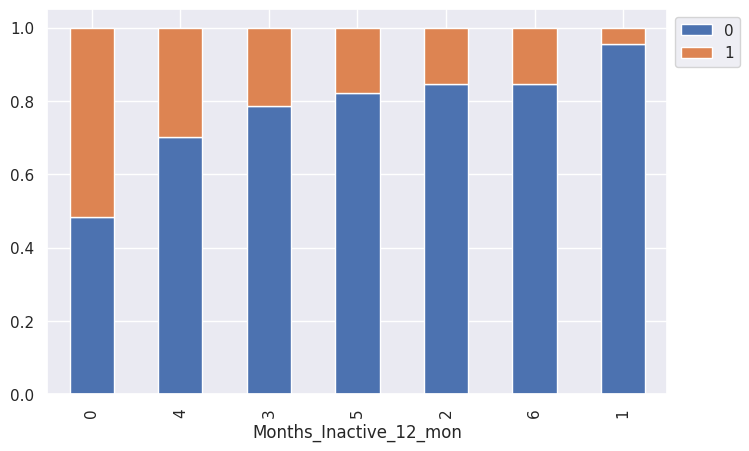

In [37]:
stacked_barplot(data, "Months_Inactive_12_mon", "Attrition_Flag")



*   In the dataset, most number of customers attrited were inactive for 2, 3 & 4 months.



**How does the change in transaction amount between Q4 and Q1 (Total_Ct_Chng_Q4_Q1) vary by the customer's account status (Attrition_Flag)?**

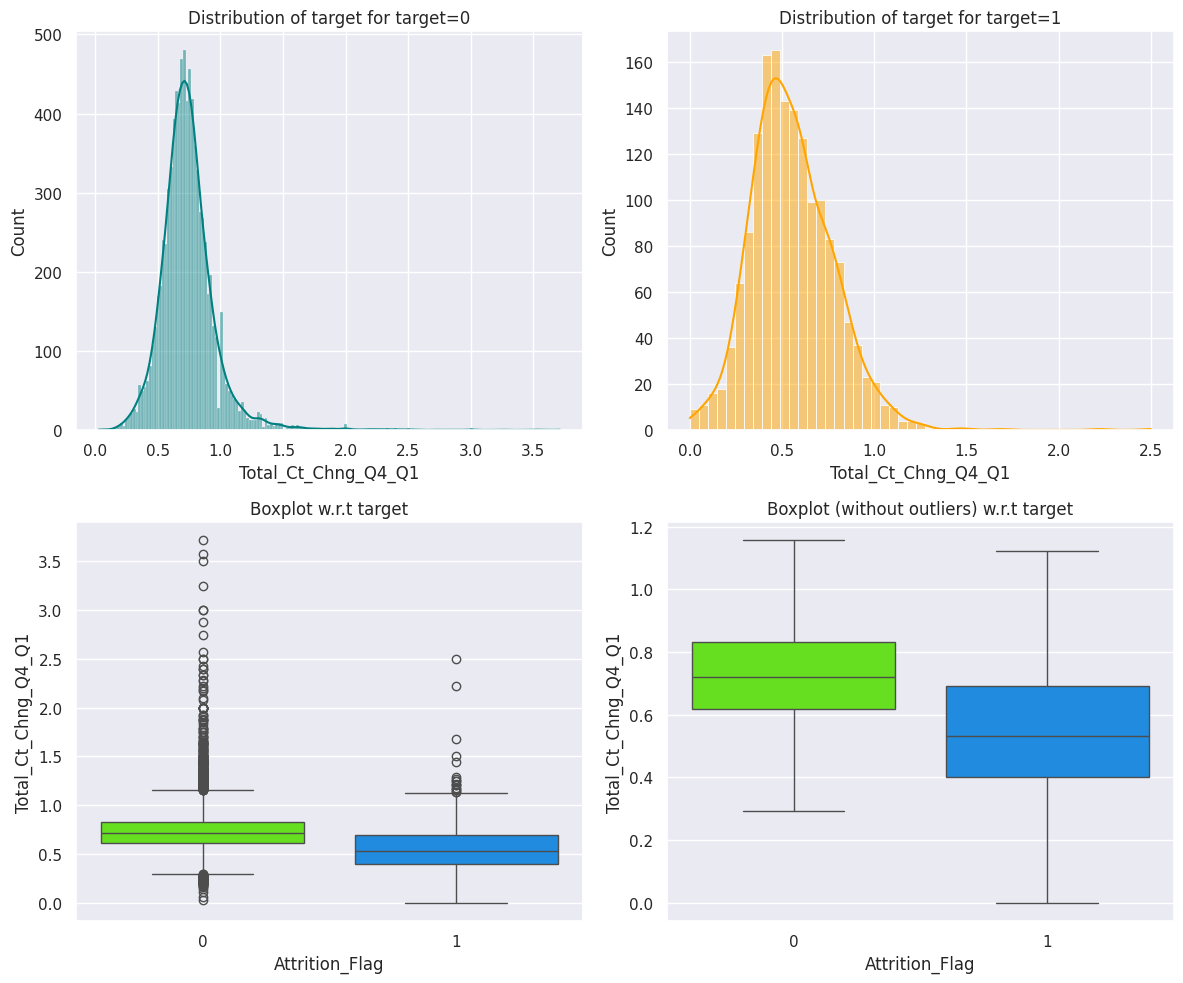

In [38]:
distribution_plot_wrt_target(data, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")



*   From the boxplot, we can see that the average of the change in transaction amount between Q4 and Q1 is lower of customers who attrited vs existing customers.




**Attrition_Flag vs Education_Level**

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


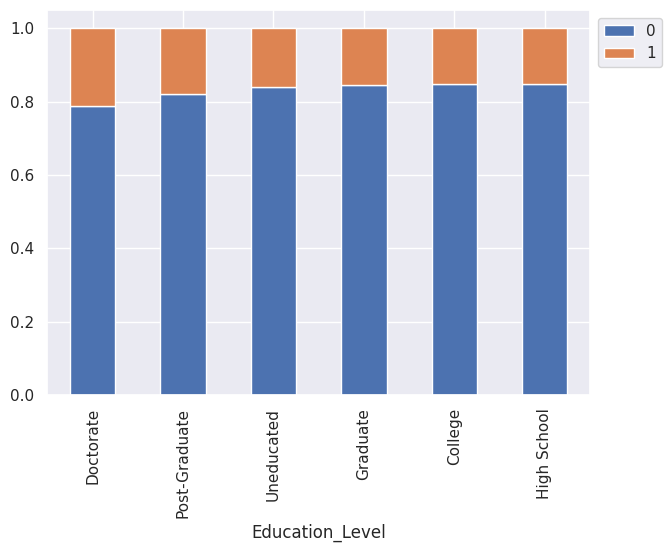

In [39]:
stacked_barplot(data, "Education_Level", "Attrition_Flag")



*   By count, the highest number of customers attrited are Graduates.
* By ratio, the highest is Doctorate customers.



**Attrition_Flag vs Income_Category**

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


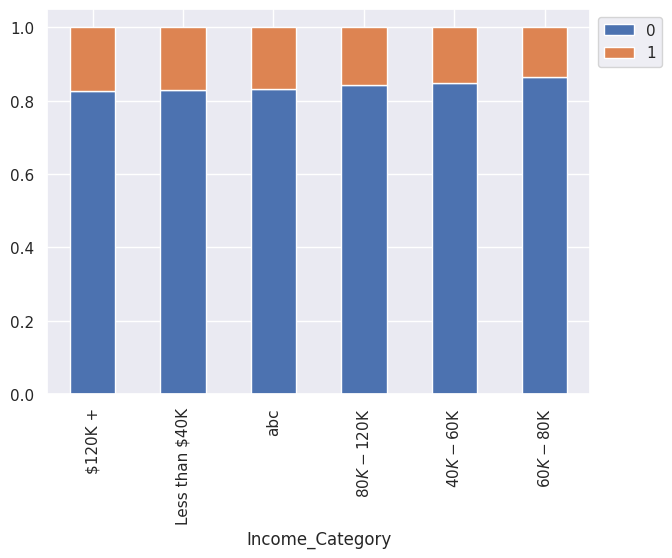

In [40]:
stacked_barplot(data, "Income_Category", "Attrition_Flag")



*   By count, the most number of customers attrited are under $40k annual income.



**Attrition_Flag vs Contacts_Count_12_mon**

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


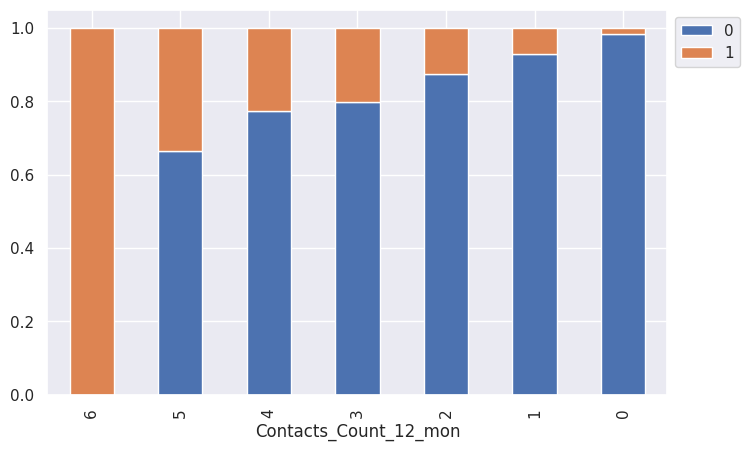

In [41]:
stacked_barplot(data, "Contacts_Count_12_mon", "Attrition_Flag")



*   It's clear that with higher the number of contact, the probability of customer attrition is high.



**Attrition_Flag vs Total_Relationship_Count**

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


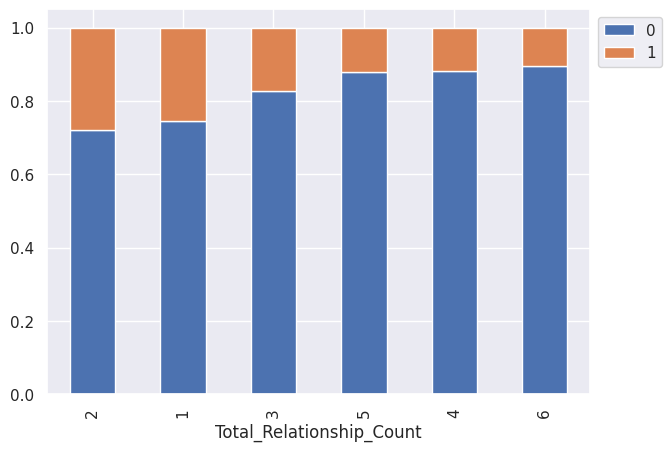

In [42]:
stacked_barplot(data, "Total_Relationship_Count", "Attrition_Flag")



*   Attrition is more among customers who has less number of products held from the bank.



**Attrition_Flag vs Dependent_count**

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


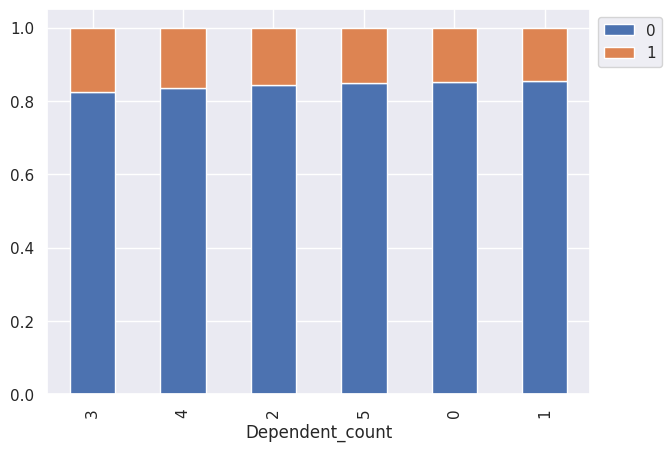

In [43]:
stacked_barplot(data, "Dependent_count", "Attrition_Flag")



*   Dependent count is not really impacting the attrition feature.



**Total_Revolving_Bal vs Attrition_Flag**

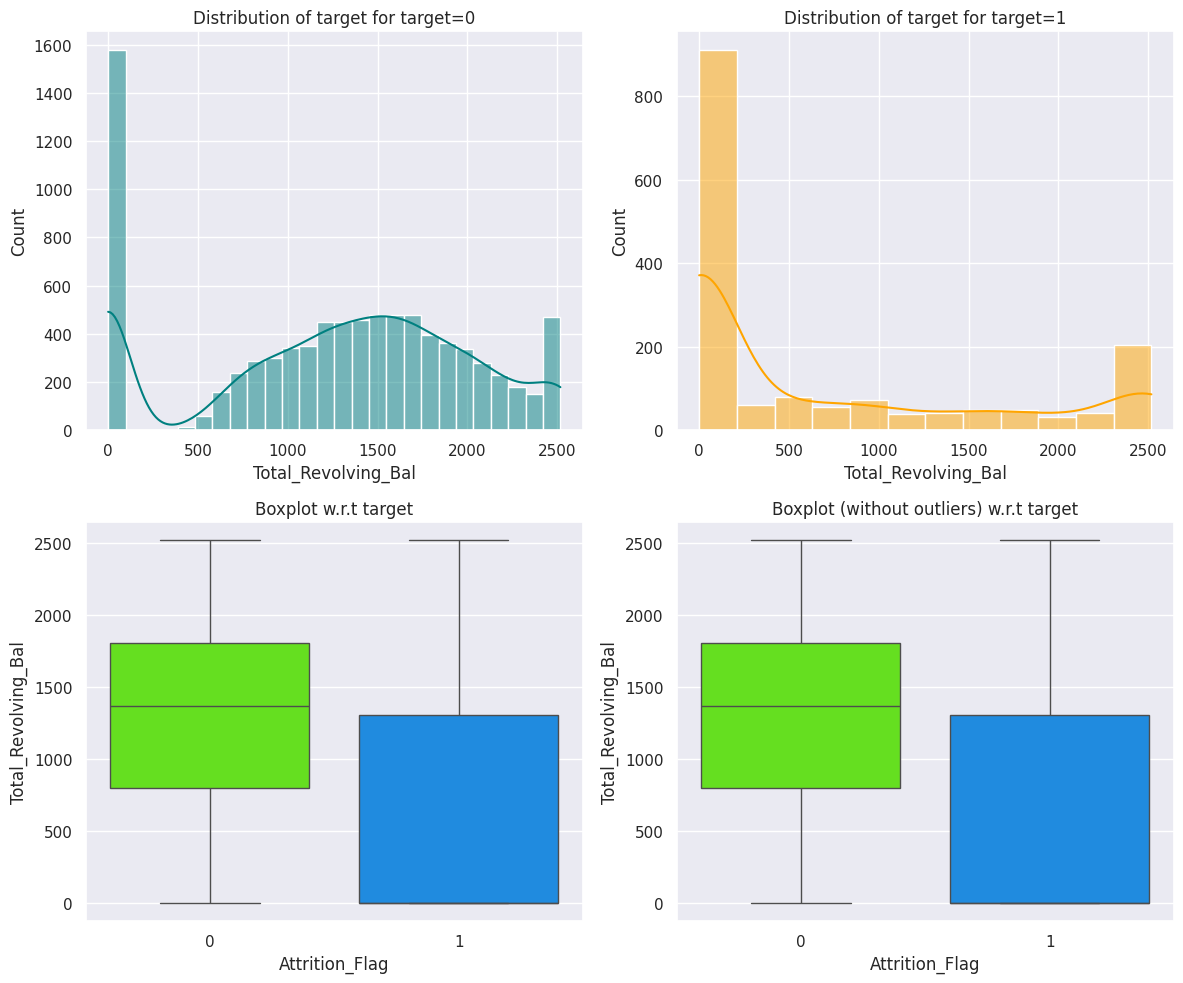

In [44]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")



*   The total revolving balance is very low for most customers who attrited from the bank.
* The average total revolving balance is around $1400 for the customers who are still with the bank.



**Attrition_Flag vs Credit_Limit**

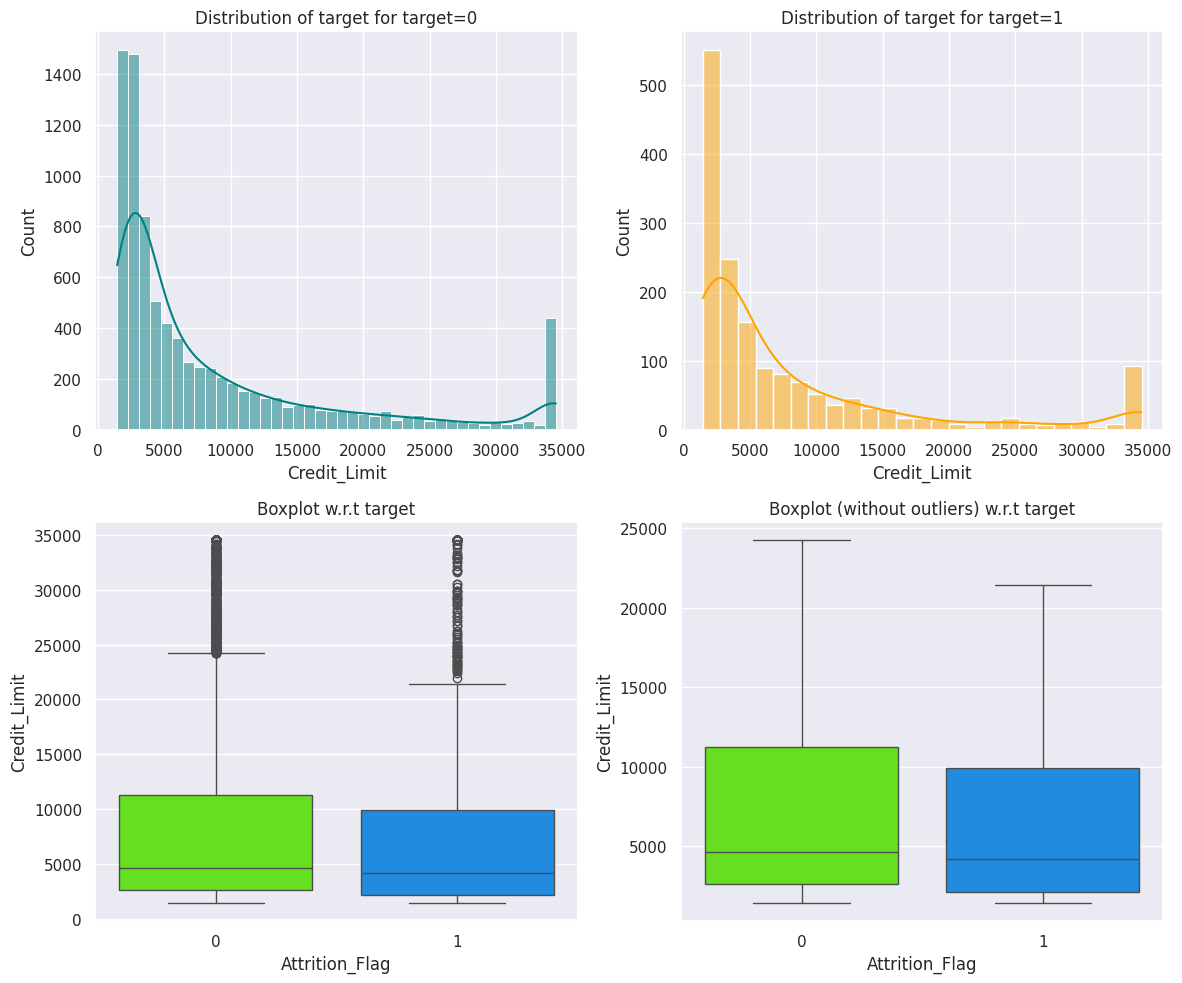

In [45]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")



*   Credit limit data looks identical for both customer groups even though the existing customer group has the mean value a bit higher.



**Total_Trans_Ct vs Attrition_Flag**

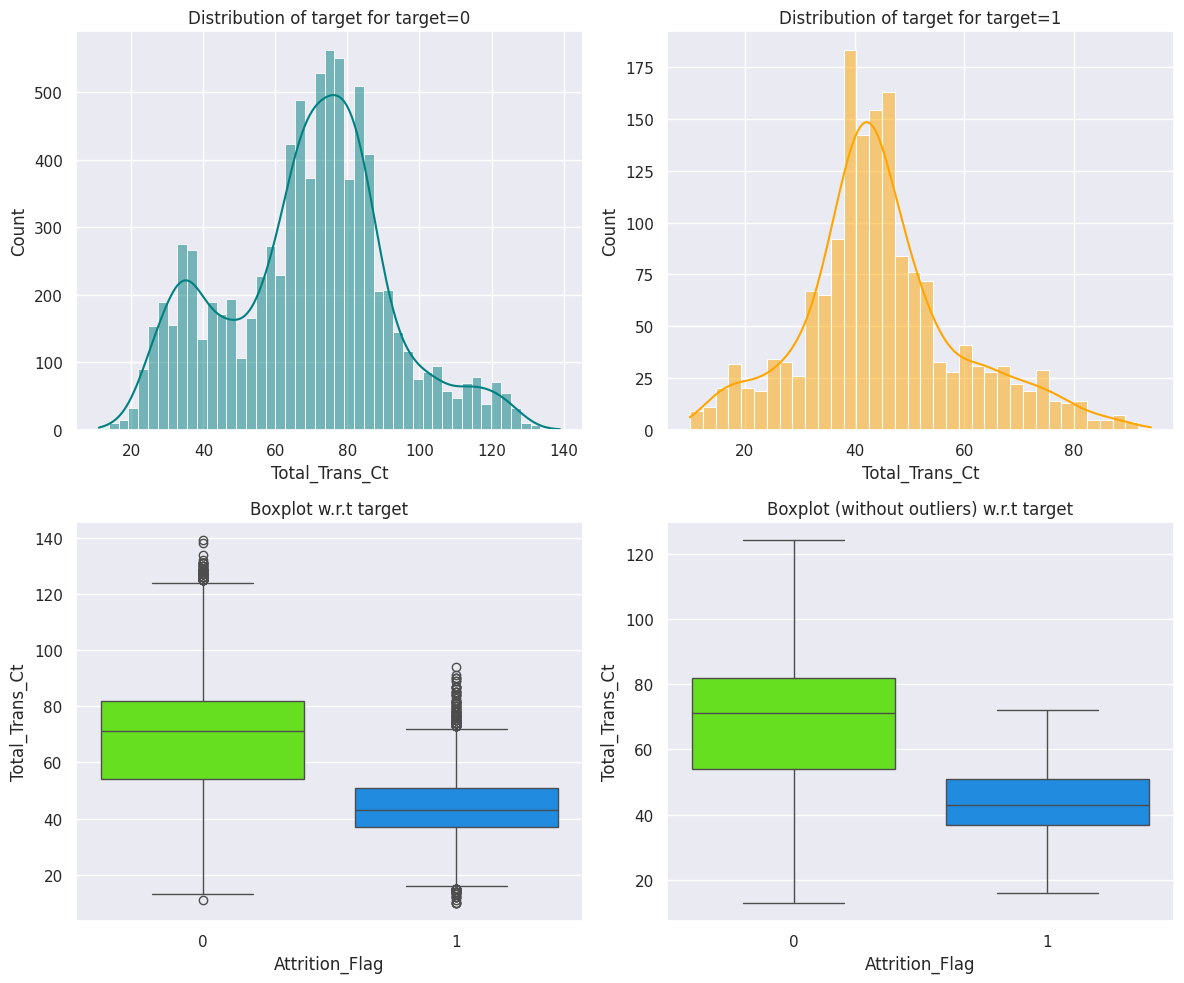

In [46]:
distribution_plot_wrt_target(data, "Total_Trans_Ct", "Attrition_Flag")



*   The average total transaction count is lesser for customers who attrited compared to the existing customers.



**Avg_Utilization_Ratio vs Attrition_Flag**

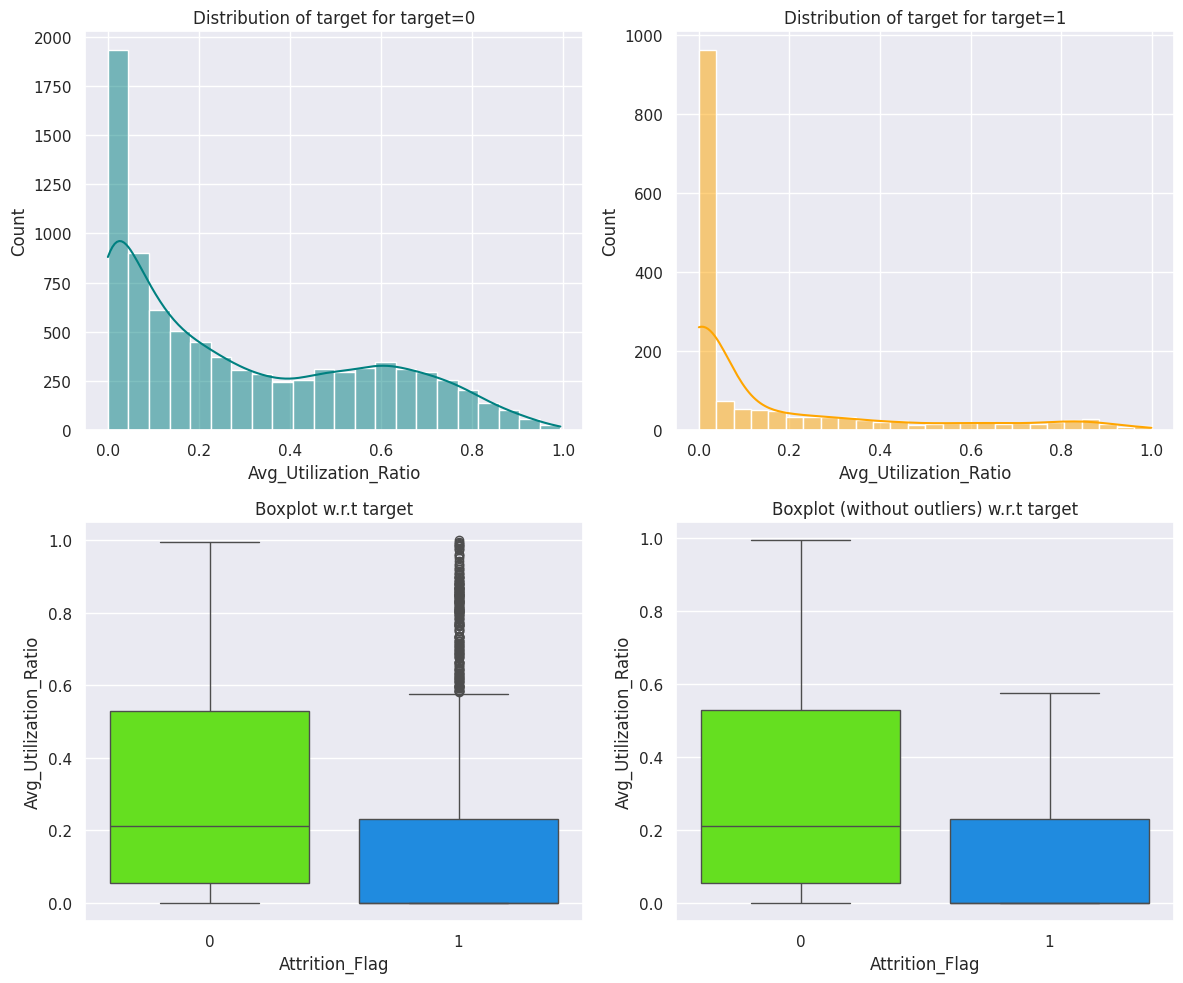

In [47]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

* The average utilization ratio is low for attrited customers compared to existing customers.
* There are outliers in the attrited customer data for this metric.

**Attrition_Flag vs Months_on_book**

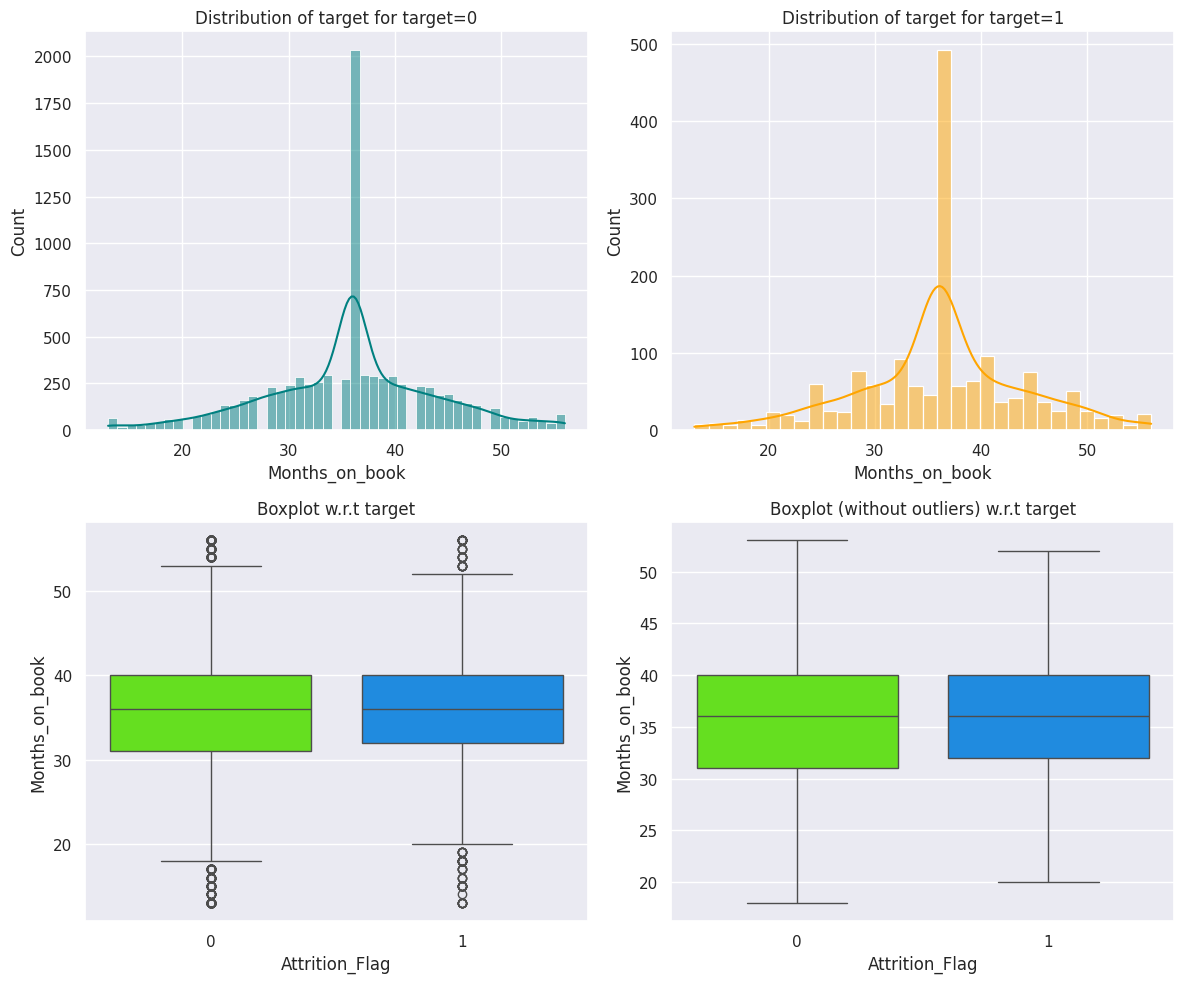

In [48]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

* Months on book data looks comparable between both customer groups.

**Attrition_Flag vs Total_Revolving_Bal**

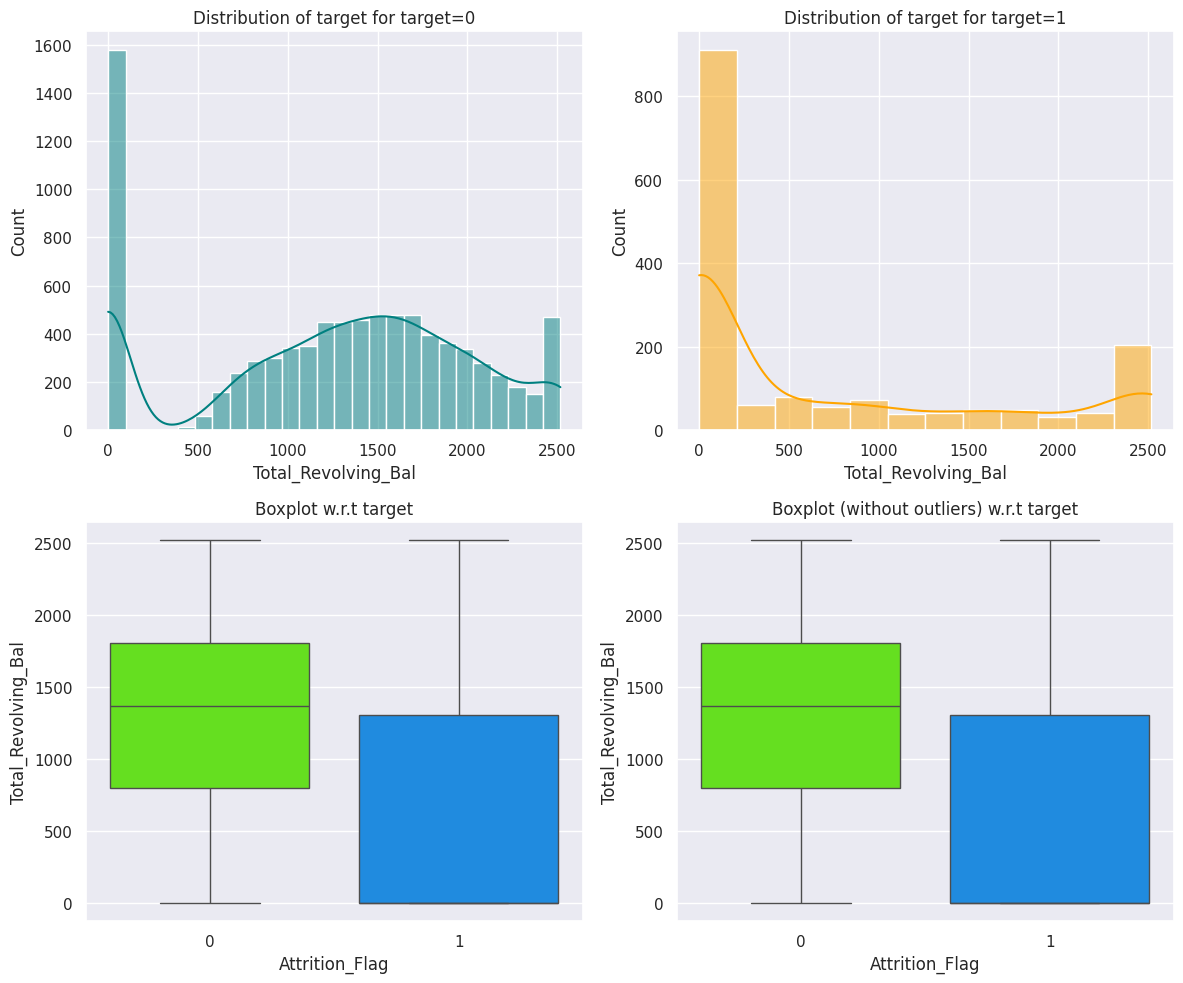

In [49]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

* Total revolving balance mean data is very low for attrited customers compared to the existing customers.

**Attrition_Flag vs Avg_Open_To_Buy**

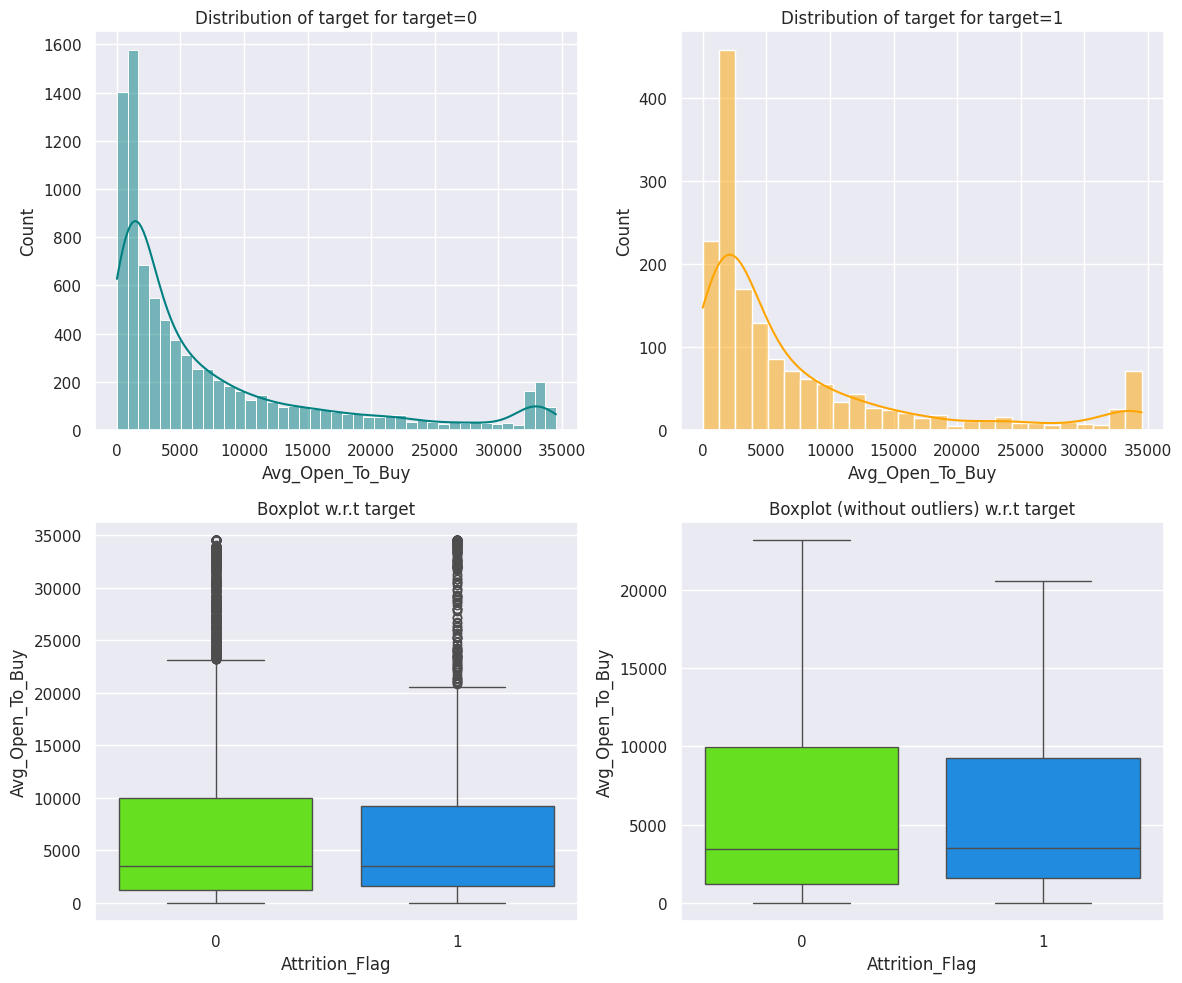

In [50]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

* This data looks comparable between both groups.

## Data Pre-processing

###Outlier detection

In [51]:
Q1 = data.quantile(0.25, numeric_only=True)  # To find the 25th percentile
Q3 = data.quantile(0.75, numeric_only=True)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [52]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
Attrition_Flag,16.066
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509


### Train-Test split

In [53]:
# let's split the data into dependent and independent variables
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

In [54]:
# let's fix Income_Category data by first replacing invalid data with NaN
X["Income_Category"].replace("abc", np.nan, inplace=True)

In [55]:
X.isna().sum()

,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0
Months_Inactive_12_mon,0


In [56]:
# split the dataset into train, validation and test sets

# first we split data into 2 parts, as temporary and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
# now we split the temp data into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 19) (2026, 19) (2026, 19)


### Missing value imputation




In [57]:
# create an instance of the imputer to fix the missing data with the most frequently occuring data
imputer = SimpleImputer(strategy="most_frequent")

In [58]:
cols_for_imputing = ["Education_Level", "Marital_Status", "Income_Category"]

# impute the columns in training set where data was missing
X_train[cols_for_imputing] = imputer.fit_transform(X_train[cols_for_imputing])

# transform the validation data
X_val[cols_for_imputing] = imputer.transform(X_val[cols_for_imputing])

# transform the test data
X_test[cols_for_imputing] = imputer.transform(X_test[cols_for_imputing])

In [59]:
# checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       



*   No columns have missing data after imputation.



### Encoding categorical variables

In [60]:
# one-hot encode the training set
X_train = pd.get_dummies(X_train, dtype=int, drop_first=True)
# one-hot encode the validation set
X_val = pd.get_dummies(X_val, dtype=int, drop_first=True)
# one-hot encode the test set
X_test = pd.get_dummies(X_test, dtype=int, drop_first=True)

print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)




*   There are 29 columns after encoding.



In [61]:
# check the first 5 rows after encoding
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
800,40,2,21,6,4,3,20056.000,1602,18454.000,0.466,1687,46,0.533,0.080,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
498,44,1,34,6,2,0,2885.000,1895,990.000,0.387,1366,31,0.632,0.657,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4356,48,4,36,5,1,2,6798.000,2517,4281.000,0.873,4327,79,0.881,0.370,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0
407,41,2,36,6,2,0,27000.000,0,27000.000,0.610,1209,39,0.300,0.000,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1
8728,46,4,36,2,2,3,15034.000,1356,13678.000,0.754,7737,84,0.750,0.090,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [62]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [63]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [64]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.985655737704918
Random Forest: 1.0
AdaBoost: 0.826844262295082
Gradient Boost: 0.875
XGBoost: 1.0

Validation Performance:

Bagging: 0.8128834355828221
Random Forest: 0.7975460122699386
AdaBoost: 0.852760736196319
Gradient Boost: 0.8558282208588958
XGBoost: 0.901840490797546


In [65]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9857, Validation Score: 0.8129, Difference: 0.1728
Random Forest: Training Score: 1.0000, Validation Score: 0.7975, Difference: 0.2025
AdaBoost: Training Score: 0.8268, Validation Score: 0.8528, Difference: -0.0259
Gradient Boost: Training Score: 0.8750, Validation Score: 0.8558, Difference: 0.0192
XGBoost: Training Score: 1.0000, Validation Score: 0.9018, Difference: 0.0982


* Gradient Boost and AdaBoost has the best performance here.

### Model Building with Oversampled data


In [66]:
print("Before Oversampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))

print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '1': 976
Before Oversampling, counts of label '0': 5099 

After Oversampling, counts of label '1': 5099
After Oversampling, counts of label '0': 5099 

After Oversampling, the shape of train_X: (10198, 29)
After Oversampling, the shape of train_y: (10198,) 



In [67]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9974504804863699
Random forest: 1.0
AdaBoost: 0.9690135320651108
Gradient Boost: 0.980976662090606
XGBoost: 1.0

Validation Performance:

Bagging: 0.8496932515337423
Random forest: 0.8680981595092024
AdaBoost: 0.901840490797546
Gradient Boost: 0.8926380368098159
XGBoost: 0.911042944785276


In [68]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9975, Validation Score: 0.8497, Difference: 0.1478
Random forest: Training Score: 1.0000, Validation Score: 0.8681, Difference: 0.1319
AdaBoost: Training Score: 0.9690, Validation Score: 0.9018, Difference: 0.0672
Gradient Boost: Training Score: 0.9810, Validation Score: 0.8926, Difference: 0.0883
XGBoost: Training Score: 1.0000, Validation Score: 0.9110, Difference: 0.0890


* AdaBoost has the best performance, followed by Gradient Boost.

### Model Building with Undersampled data

In [69]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [70]:
print("Before Under Sampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before Under Sampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, count of label '1': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, count of label '0': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, count of label '1': 976
Before Under Sampling, count of label '0': 5099 

After Under Sampling, count of label '1': 976
After Under Sampling, count of label '0': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



In [71]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric='logloss')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9907786885245902
Random forest: 1.0
AdaBoost: 0.9528688524590164
Gradient Boost: 0.9805327868852459
XGBoost: 1.0

Validation Performance:

Bagging: 0.9294478527607362
Random forest: 0.9386503067484663
AdaBoost: 0.9601226993865031
Gradient Boost: 0.9570552147239264
XGBoost: 0.9693251533742331


In [72]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9908, Validation Score: 0.9294, Difference: 0.0613
Random forest: Training Score: 1.0000, Validation Score: 0.9387, Difference: 0.0613
AdaBoost: Training Score: 0.9529, Validation Score: 0.9601, Difference: -0.0073
Gradient Boost: Training Score: 0.9805, Validation Score: 0.9571, Difference: 0.0235
XGBoost: Training Score: 1.0000, Validation Score: 0.9693, Difference: 0.0307


* AdaBoost has the best performance, followed by XGBoost and Gradient Boost.

### Hyperparameter Tuning

#### Sample Parameter Grids

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase


- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost (optional):

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

#### Tuning Gradient Boosting model with original data

In [73]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

# parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

# fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8104395604395604:
CPU times: user 4.97 s, sys: 490 ms, total: 5.46 s
Wall time: 2min 57s


In [74]:
# use the best estimator hyperparameters to initiate the model
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.1,
    init=AdaBoostClassifier(random_state=1)
)
tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.5, random_state=1, subsample=0.9)

In [75]:
# checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train, y_train)
print(gbm1_train)

   Accuracy  Recall  Precision    F1
0     0.972   0.867      0.955 0.909


In [76]:
# checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
print(gbm1_val)

   Accuracy  Recall  Precision    F1
0     0.968   0.862      0.937 0.898


#### Tuning AdaBoost model with undersampled data

In [77]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.05, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9467346938775512:
CPU times: user 1.84 s, sys: 122 ms, total: 1.96 s
Wall time: 49.7 s


In [78]:
tuned_ada1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.05,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
tuned_ada1.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.05, n_estimators=100, random_state=1)

In [79]:
# checking model's performance on training set
ada1_train = model_performance_classification_sklearn(tuned_ada1, X_train_un, y_train_un)
print(ada1_train)

   Accuracy  Recall  Precision    F1
0     0.973   0.978      0.968 0.973


In [80]:
# checking model's performance on validation set
ada1_val = model_performance_classification_sklearn(tuned_ada1, X_val, y_val)
print(ada1_val)

   Accuracy  Recall  Precision    F1
0     0.937   0.966      0.731 0.832


#### Tuning AdaBoost model with oversampled data

In [81]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

# fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9488225672997362:
CPU times: user 8.25 s, sys: 415 ms, total: 8.67 s
Wall time: 3min 13s


In [82]:
tuned_ada2 = AdaBoostClassifier(
    random_state=1,
    n_estimators=100,
    learning_rate=0.1,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
)
tuned_ada2.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [83]:
# checking model's performance on training set
ada2_train = model_performance_classification_sklearn(tuned_ada2, X_train_over, y_train_over)
print(ada2_train)

   Accuracy  Recall  Precision    F1
0     0.984   0.987      0.981 0.984


In [84]:
# checking model's performance on validation set
ada2_val = model_performance_classification_sklearn(tuned_ada2, X_val, y_val)
print(ada2_val)

   Accuracy  Recall  Precision    F1
0     0.962   0.905      0.868 0.886


#### Tuning XGBoost model with undersampled data

In [85]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# parameter grid to pass in RandomSearchCV
param_grid={
    'n_estimators':np.arange(50,110,25),
    'scale_pos_weight':[1,2,5],
    'learning_rate':[0.01,0.1,0.05],
    'gamma':[1,3],
    'subsample':[0.7,0.9]
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=0.9979591836734695:
CPU times: user 1.92 s, sys: 142 ms, total: 2.07 s
Wall time: 46.1 s


In [86]:
tuned_xgb1 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3,
)
tuned_xgb1.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [87]:
# checking model's performance on training set
xgb1_train = model_performance_classification_sklearn(tuned_xgb1, X_train_un, y_train_un)
print(xgb1_train)

   Accuracy  Recall  Precision    F1
0     0.763   1.000      0.678 0.808


In [88]:
# checking model's performance on validation set
xgb1_val = model_performance_classification_sklearn(tuned_xgb1, X_val, y_val)
print(xgb1_val)

   Accuracy  Recall  Precision    F1
0     0.582   1.000      0.278 0.435


## Model Comparison and Final Model Selection

In [89]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        ada1_train.T,
        ada2_train.T,
        xgb1_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting trained with original data",
    "AdaBoost trained with undersampled data",
    "AdaBoost trained with oversampled data",
    "XGBoost trained with undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting trained with original data,AdaBoost trained with undersampled data,AdaBoost trained with oversampled data,XGBoost trained with undersampled data
Accuracy,0.972,0.973,0.984,0.763
Recall,0.867,0.978,0.987,1.000
Precision,0.955,0.968,0.981,0.678
F1,0.909,0.973,0.984,0.808


In [90]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_val.T,
        ada1_val.T,
        ada2_val.T,
        xgb1_val.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting trained with original data",
    "AdaBoost trained with undersampled data",
    "AdaBoost trained with oversampled data",
    "XGBoost trained with undersampled data"
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient Boosting trained with original data,AdaBoost trained with undersampled data,AdaBoost trained with oversampled data,XGBoost trained with undersampled data
Accuracy,0.968,0.937,0.962,0.582
Recall,0.862,0.966,0.905,1.000
Precision,0.937,0.731,0.868,0.278
F1,0.898,0.832,0.886,0.435




*   AdaBoost model trained with undersampled data shows a generalized performance with very good Recall scores for training and validation dataset.
* XGBoost model also has very high Recall scores, but the Precision scores are very low for that which means the model will predict that most of the customers will attrite even if they are not.
* Based on this, we will choose AdaBoost model trained with undersampled data as the best model.



### Test set final performance

In [91]:
# let's check the performance on test set
ada1_test = model_performance_classification_sklearn(tuned_ada1, X_test, y_test)
print(ada1_test)

   Accuracy  Recall  Precision    F1
0     0.934   0.969      0.718 0.825


* Adaboost model trained on undersampled data has given ~97% Recall score on the test set.
* This performance matches with what we achieved with this model on the training and validation sets.
* This shows that it can be consided as a generalized model.

### Feature Importances

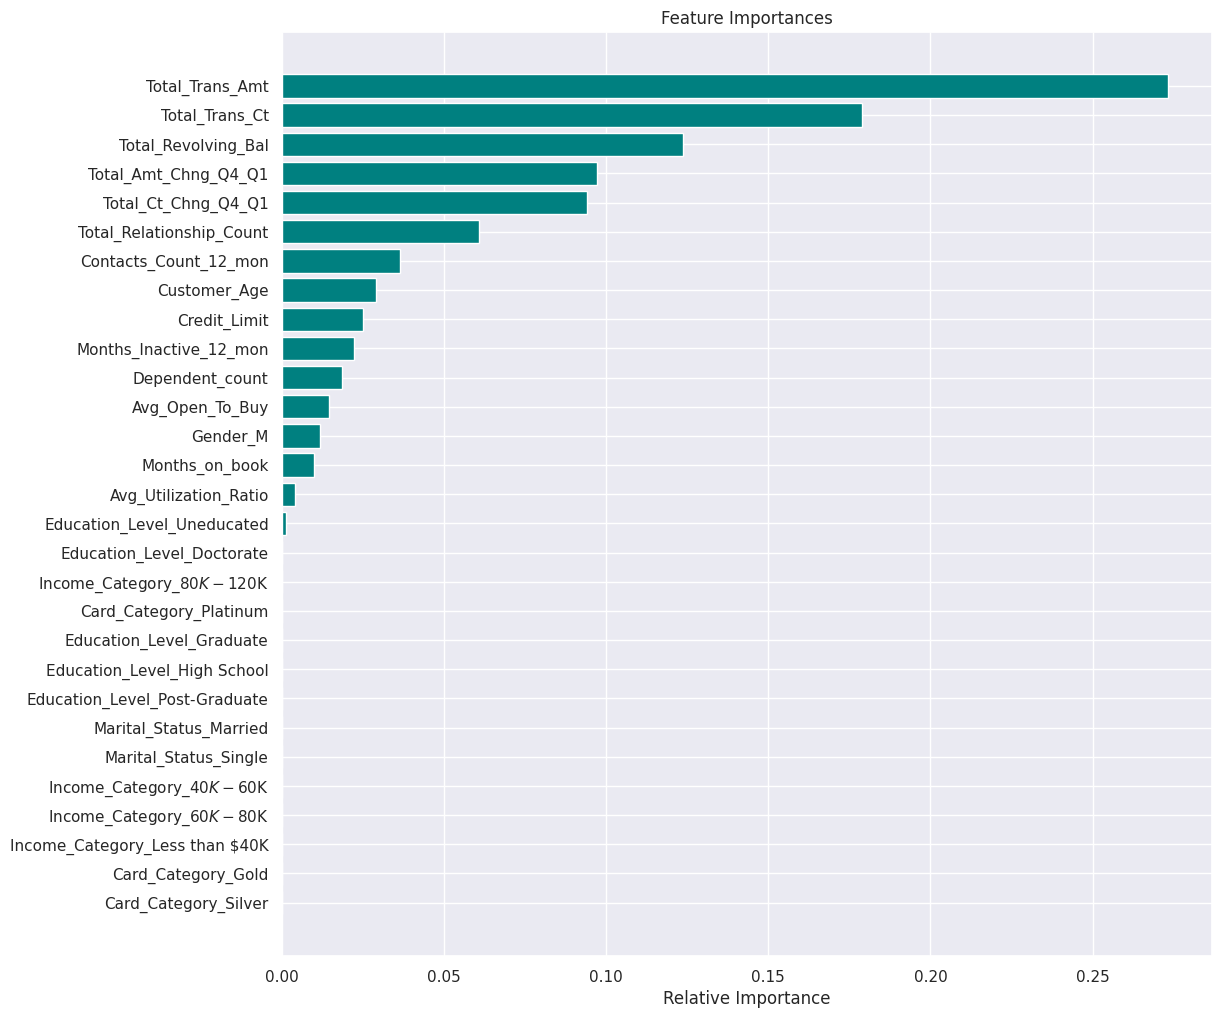

In [92]:
feature_names = X_train.columns
importances = tuned_ada1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="teal", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()



*   The most important features considered by the model for prediction are "Total Transaction Amount", "Total Transaction Count", "Total Revolving Balance", "Change in Transaction Amount (Q4 over Q1) and "Total Number of Products held by the Customer"



# Business Insights and Conclusions



*   Customers with lower total transaction amount and total transaction count in the last 12 months has a higher chance of leaving the credit card services. Bank should take steps to improve the credit card usage of these customers by providing additional offers and incentives.
*   Total revolving balance is another attribute that has a correlation with credit card usage. Attrition is higher for customers with lower total revolving balance, and the bank should try to increase this by taking steps like lowering interest rates on this component.
* Customers using lesser number of products from the bank shows higher probability of leaving the bank. Bank can run awareness campaigns targeting these customers about the products and services that they offer apart from the credit card services to improve the engagement and adoption of these additional products.
* Bank should also focus on customers that has a drop in transaction count and amount between Q4 of last year and Q1 this year to identify what the reason is for the drop and try to address those.



***